
زياد علي إبراهيم دسوقي - سيكشن - 
7

صبري طارق صبري  - سيكشن 
9

عبد الرحمن مجدي مصطفى محمد - سيكشن 
9

عبد الله محمد أنور عبد المقصود - سيكشن 
9

علي زين علي إبراهيم - سيكشن 
10
```
# Problem
#### Using California Housing Prices Dataset to predict Houses Prices

[California Housing Prices Problem](https://www.kaggle.com/camnugent/california-housing-prices)

[Dataset](https://www.kaggle.com/camnugent/california-housing-prices/downloads/california-housing-prices.zip/1)
- The data contains information from the 1990 California census
- The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

  1. longitude: A measure of how far west a house is; a higher value is farther west
  2. latitude: A measure of how far north a house is; a higher value is farther north
  3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
  4. totalRooms: Total number of rooms within a block
  5. totalBedrooms: Total number of bedrooms within a block
  6. population: Total number of people residing within a block
  7. households: Total number of households, a group of people residing within a home unit, for a block
  8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
  9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
  10. oceanProximity: Location of the house w.r.t ocean/sea

# References
- Hands-On Machine learning with Scikit-Learn and Tensorflow (Written by **Aurélien Géron's**)
  - second chapter
- [Stanford Lecture Collection | Convolutional Neural Networks for Visual Recognition (Spring 2017)](https://www.youtube.com/playlist?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv)
- [DaTaCamp](https://www.datacamp.com/)
- [Data School](https://www.datacamp.com)
- Raje
- [Cloud AI Adventure](https://www.youtube.com/playlist?list=PLIivdWyY5sqJxnwJhe3etaK7utrBiPBQ2)
- [Machine Learning & Deep Learning Specialization with Python, Scikit-Learn and TensforFlow | CloudxLab](https://www.youtube.com/playlist?list=PLFhNzVKP1pVrNU8cTL_t-8YzPLF8i8PaS) 

> [Datasets](https://www.facebook.com/groups/big.data.egypt/permalink/1787907181468475/):


> Arabic Resources:
- [CAT Live | Deep Learning and Neural Nets | in Arabic](https://www.youtube.com/watch?v=QWrWDNN2_RQ&t=564s)
- [ask Developer](https://www.youtube.com/watch?v=t2rMG1aaumM&list=PLJYBTsbldfv8tWX-KJMMmCO313pBXKL4l&index=57&t=0s)
- [abu bakr](https://www.youtube.com/playlist?list=PLvLvlVqNQGHC3uV0T6TTndqNDDR69tN_1)
- [Ali Hamdi](https://www.youtube.com/playlist?list=PL1B5MFiEjZtqXiLMfe9jNC6H97sTA9hJE)
- [Hesham Asem](https://www.youtube.com/channel/UCxxljM6JkSvJVSD_T90ZnMw/playlists)
- [Ahmed Gad](https://www.youtube.com/channel/UCuewOYbBXH5gwhfOrQOZOdw)
- [
Farisology](https://www.youtube.com/channel/UCe2_Z7UrjYngN110gDyttiQ)

- [mlcourse.ai](https://mlcourse.ai/)
- [fast.ai](https://fast.ai/)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [0]:
df = pd.read_csv('data/housing.csv', sep=',', encoding='utf8')

In [0]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [0]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Histogram

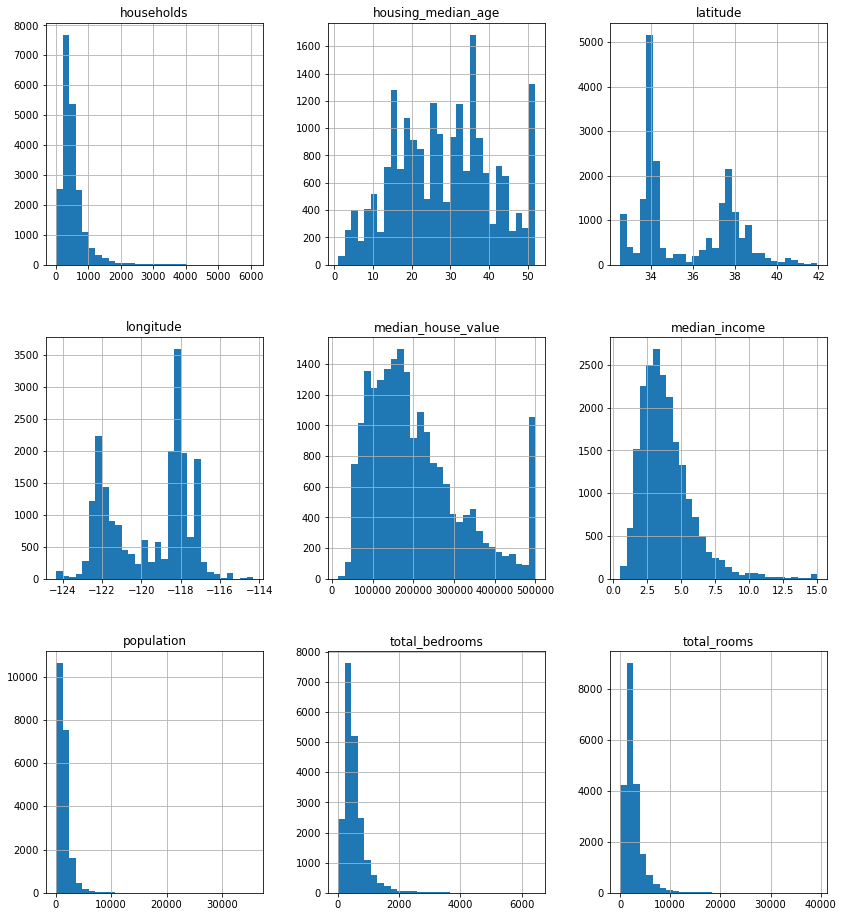

In [0]:
df.hist(bins=30, figsize=(14,16))
plt.show()

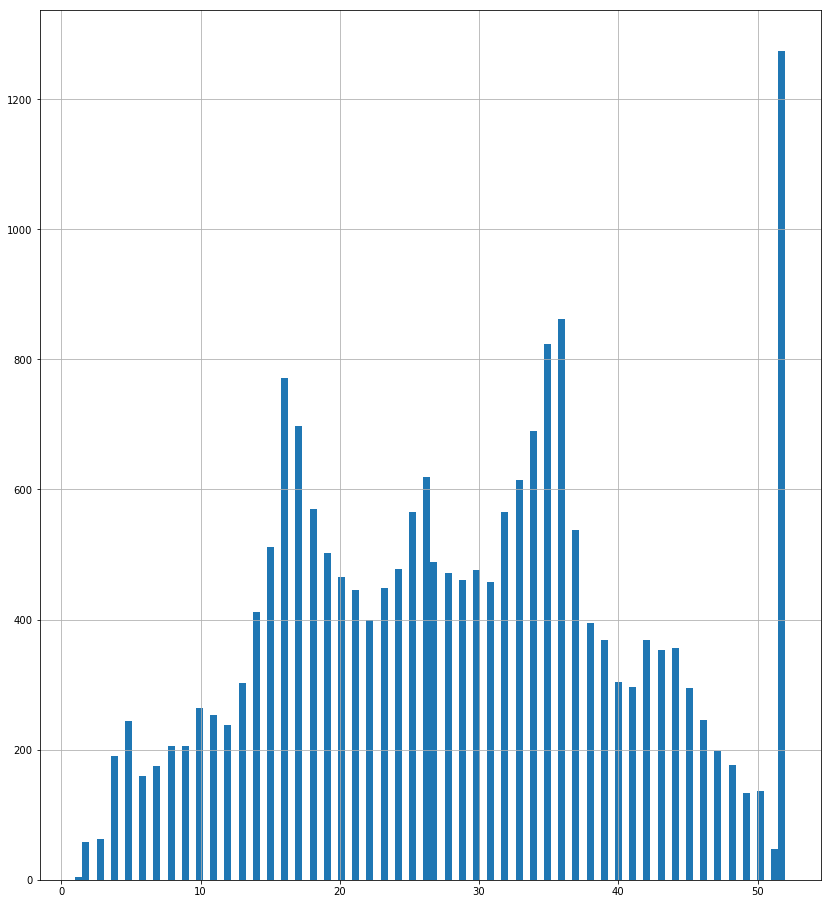

In [0]:
df['housing_median_age'].hist(bins=100, figsize=(14,16))
plt.show()

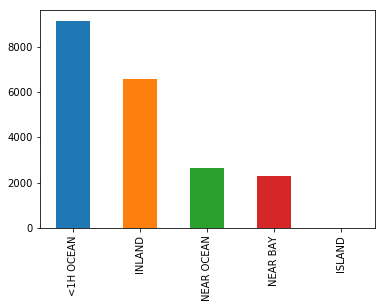

In [0]:
pd.value_counts(df['ocean_proximity']).plot.bar()

## Data Description

In [0]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Visualizing Geographical Data

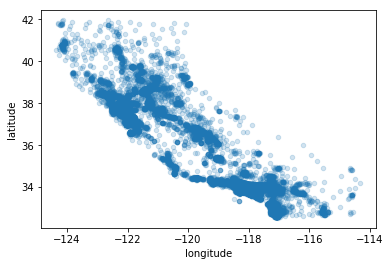

In [0]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.2)

## Regression to Classification

In [0]:
def value_to_class(value):
    _cls= 0
    if value >= 400000:
        _cls = 1
    elif value >= 300000:
        _cls = 2
    elif value >= 200000:
        _cls = 3
    elif value >= 100000:
        _cls = 4
    else:
        _cls = 5
    
    return _cls

In [0]:
df['median_house_CLASS'] = df['median_house_value'].apply(value_to_class)

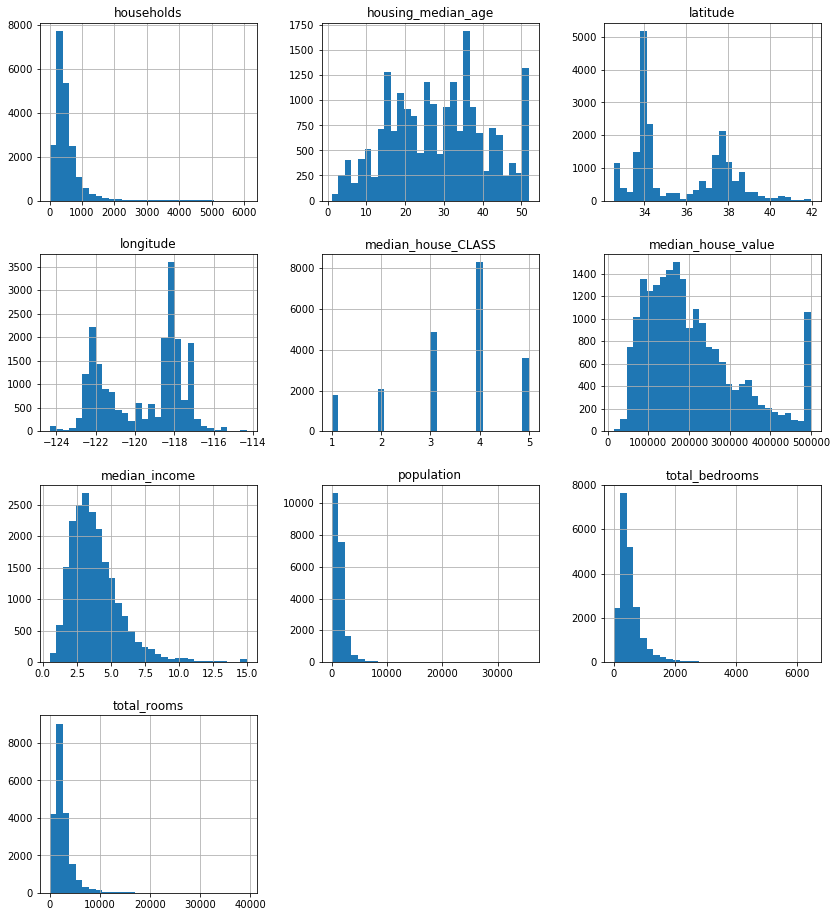

In [0]:
df.hist(bins=30, figsize=(14,16))
plt.show()

## Missing Values

In [0]:
mod_df = pd.read_csv('data/mod_data.csv', sep=',', encoding='utf8')
mod_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0          NaN          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                 NaN       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0         126            NaN              452600        NEAR BAY  
1         NaN        1138         8.3014              358500        NEAR BAY  
2       496.0         177         7.2574              352100        NEAR BAY  
3       558.0         219         5.6431              341300        NEAR BAY  
4       565.0         259         3.8462              342200        NEAR BAY

In [0]:
mod_df.isna().sum()

longitude               0
latitude                0
housing_median_age      2
total_rooms             3
total_bedrooms        207
population             10
households              0
median_income           6
median_house_value      0
ocean_proximity         0
dtype: int64

In [0]:
mod_df.dropna(axis=1).head()

longitude  latitude  households  median_house_value ocean_proximity
0    -122.23     37.88         126              452600        NEAR BAY
1    -122.22     37.86        1138              358500        NEAR BAY
2    -122.24     37.85         177              352100        NEAR BAY
3    -122.25     37.85         219              341300        NEAR BAY
4    -122.25     37.85         259              342200        NEAR BAY

In [0]:
mod_df.dropna(axis=0).head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
8     -122.26     37.84                42.0       2555.0           665.0   
13    -122.26     37.84                52.0        696.0           191.0   
16    -122.27     37.85                52.0       1966.0           347.0   

    population  households  median_income  median_house_value ocean_proximity  
2        496.0         177         7.2574              352100        NEAR BAY  
3        558.0         219         5.6431              341300        NEAR BAY  
8       1206.0         595         2.0804              226700        NEAR BAY  
13       345.0         174         2.6736              191300        NEAR BAY  
16       793.0         331         2.7750              152500        NEAR BAY

In [0]:
mod_df.dropna(axis=1, how='any')

longitude  latitude  households  median_house_value ocean_proximity
0        -122.23     37.88         126              452600        NEAR BAY
1        -122.22     37.86        1138              358500        NEAR BAY
2        -122.24     37.85         177              352100        NEAR BAY
3        -122.25     37.85         219              341300        NEAR BAY
4        -122.25     37.85         259              342200        NEAR BAY
5        -122.25     37.85         193              269700        NEAR BAY
6        -122.25     37.84         514              299200        NEAR BAY
7        -122.25     37.84         647              241400        NEAR BAY
8        -122.26     37.84         595              226700        NEAR BAY
9        -122.25     37.84         714              261100        NEAR BAY
10       -122.26     37.85         402              281500        NEAR BAY
11       -122.26     37.85         734              241800        NEAR BAY
12       -122.26     37.85         468              213500        NEAR BAY
13       -122.26     37.84         174              191300        NEAR BAY
14       -122.26     37.85         620              159200        NEAR BAY
15       -122.26     37.85         264              140000        NEAR BAY
16       -122.27     37.85         331              152500        NEAR BAY
17       -122.27     37.85         303              155500        NEAR BAY
18       -122.26     37.84         419              158700        NEAR BAY
19       -122.27     37.84         275              162900        NEAR BAY
20       -122.27     37.85         166              147500        NEAR BAY
21       -122.27     37.85         366              159800        NEAR BAY
22       -122.27     37.84         478              113900        NEAR BAY
23       -122.27     37.84         325               99700        NEAR BAY
24       -122.27     37.84         422              132600        NEAR BAY
25       -122.28     37.85         119              107500        NEAR BAY
26       -122.28     37.85         239               93800        NEAR BAY
27       -122.28     37.85         397              105500        NEAR BAY
28       -122.28     37.84         473              108900        NEAR BAY
29       -122.28     37.84         155              132000        NEAR BAY
...          ...       ...         ...                 ...             ...
20610    -121.56     39.10         439               45500          INLAND
20611    -121.55     39.10         409               47000          INLAND
20612    -121.56     39.08         267               48300          INLAND
20613    -121.55     39.09         384               53400          INLAND
20614    -121.54     39.08         474               58000          INLAND
20615    -121.54     39.08         197               57500          INLAND
20616    -121.53     39.08         375               55100          INLAND
20617    -121.53     39.06         114               70800          INLAND
20618    -121.55     39.06         226               63400          INLAND
20619    -121.56     39.01         296               99100          INLAND
20620    -121.48     39.05          48              100000          INLAND
20621    -121.47     39.01         157               77500          INLAND
20622    -121.44     39.00         157               67000          INLAND
20623    -121.37     39.03         227               65500          INLAND
20624    -121.41     39.04         291               87200          INLAND
20625    -121.52     39.12          14               72000          INLAND
20626    -121.43     39.18         171               93800          INLAND
20627    -121.32     39.13          59              162500          INLAND
20628    -121.48     39.10         390               92400          INLAND
20629    -121.39     39.12        1818              108300          INLAND
20630    -121.32     39.29         445              112000          INLAND
20631    -121.40     39.33      

In [0]:
mod_df['total_rooms'].fillna(1).head()

0     880.0
1       1.0
2    1467.0
3    1274.0
4    1627.0
Name: total_rooms, dtype: float64

In [0]:
mod_df['total_rooms'] = mod_df['total_rooms'].fillna(1)

In [0]:
mod_df['population'] = mod_df['population'].fillna( mod_df['population'].mean() )

In [0]:
mod_df['population'] = mod_df['population'].replace(['MISSED'], np.nan)

## Outliers

In [0]:
salaries = {'ID':['e1', 'e2', 'e3', 'e4', 'e5'],
           'salary':[1000,1800,900,150000,3200]}

salaries_df = pd.DataFrame(salaries)
salaries_df.head()

ID  salary
0  e1    1000
1  e2    1800
2  e3     900
3  e4  150000
4  e5    3200

In [0]:
salaries_df['salary'].mean()

31380.0

### Detecting using Plotting

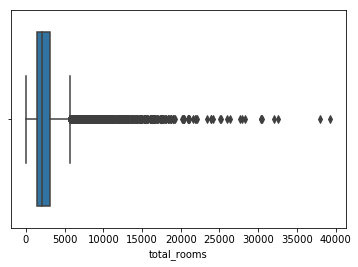

In [0]:
sns.boxplot(x=df['total_rooms'])

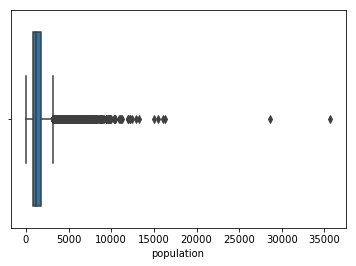

In [0]:
sns.boxplot(x=df['population'])

In [0]:
print("All:", df['total_rooms'].count())

print("Outliers:", df[ (df['total_rooms']>5000) ] ['total_rooms'].count())

All: 20640
Outliers: 1758


In [0]:
clean_df = df[ (df['total_rooms']<5000) ]

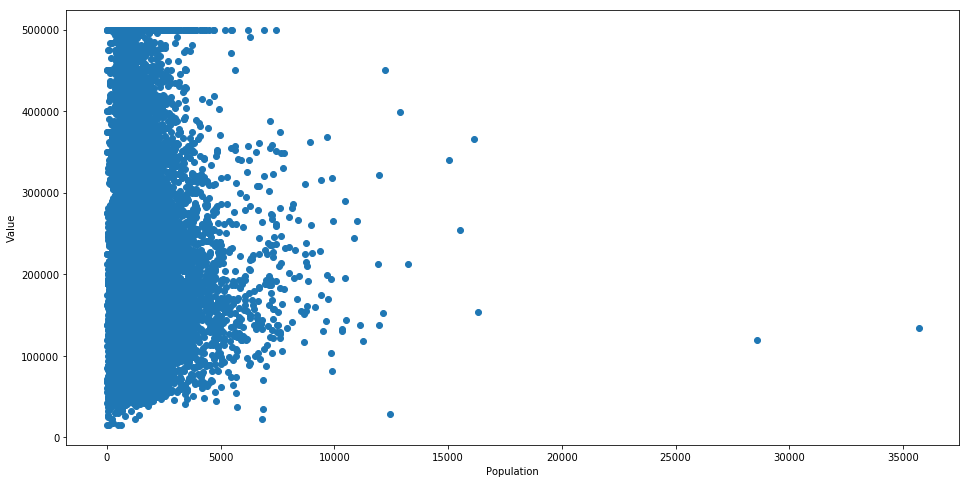

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['population'], df['median_house_value'])

ax.set_xlabel('Population')
ax.set_ylabel('Value')

plt.show()

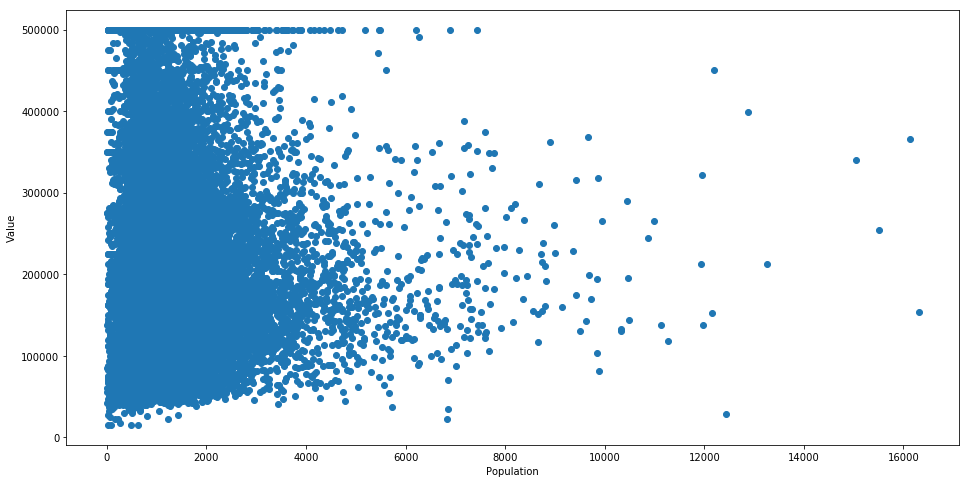

In [0]:
t_df = df[ df['population'] < 20000 ]
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(t_df['population'], t_df['median_house_value'])

ax.set_xlabel('Population')
ax.set_ylabel('Value')

plt.show()

In [0]:
clean_df = df[ (df['total_rooms']<5000) & (df['population'] < 20000) ]

### Detecting using Z-Score

In [0]:
z = np.abs( stats.zscore(df.drop(['ocean_proximity'], axis=1)) )
print(z.shape)

(20640, 10)


In [0]:
_res = np.where( z > 3 )

C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [0]:
print(_res[0])
print(_res[1])

[   95   104   116 ... 20629 20629 20629]
[6 6 6 ... 3 5 6]


In [0]:
z[95][6]

4.76945485105528

# Correlation

In [0]:
x = np.random.randint(0,100,1000)
y = np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[ 1.        , -0.04031303],
       [-0.04031303,  1.        ]])

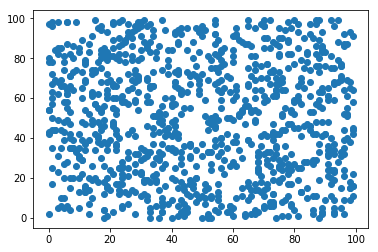

In [0]:
plt.scatter(x,y)
plt.show()

In [0]:
x = np.random.randint(0,100,1000)
y = x + np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[1.       , 0.6947837],
       [0.6947837, 1.       ]])

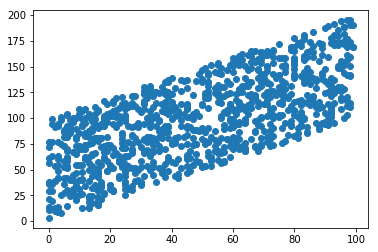

In [0]:
plt.scatter(x,y)
plt.show()

In [0]:
x = np.random.randint(0,100,1000)
y = 100 - x - np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[ 1.        , -0.71538651],
       [-0.71538651,  1.        ]])

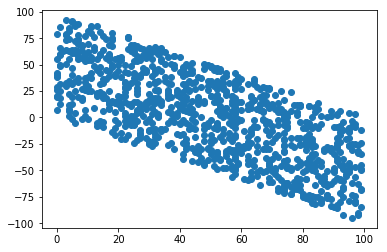

In [0]:
plt.scatter(x,y)
plt.show()

In [0]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
median_house_CLASS   0.041877  0.148951           -0.097020    -0.137206   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
median_house_CLASS       -0.057550    0.013049   -0.074098      -0.657812   

                    median_house_value  median_house_CLASS  
longitude                    -0.045967            0.041877  
latitude                     -0.144160            0.148951  
housing_median_age            0.105623           -0.097020  
total_rooms                   0.134153           -0.137206  
total_bedrooms                0.049686           -0.057550  
population                   -0.024650            0.013049  
households                    0.065843           -0.074098  
median_income                 0.688075           -0.657812  
median_house_value            1.000000           -0.967303  
median_house_CLASS           -0.967303            1.000000

C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269880D6048>,
      dtype=object)

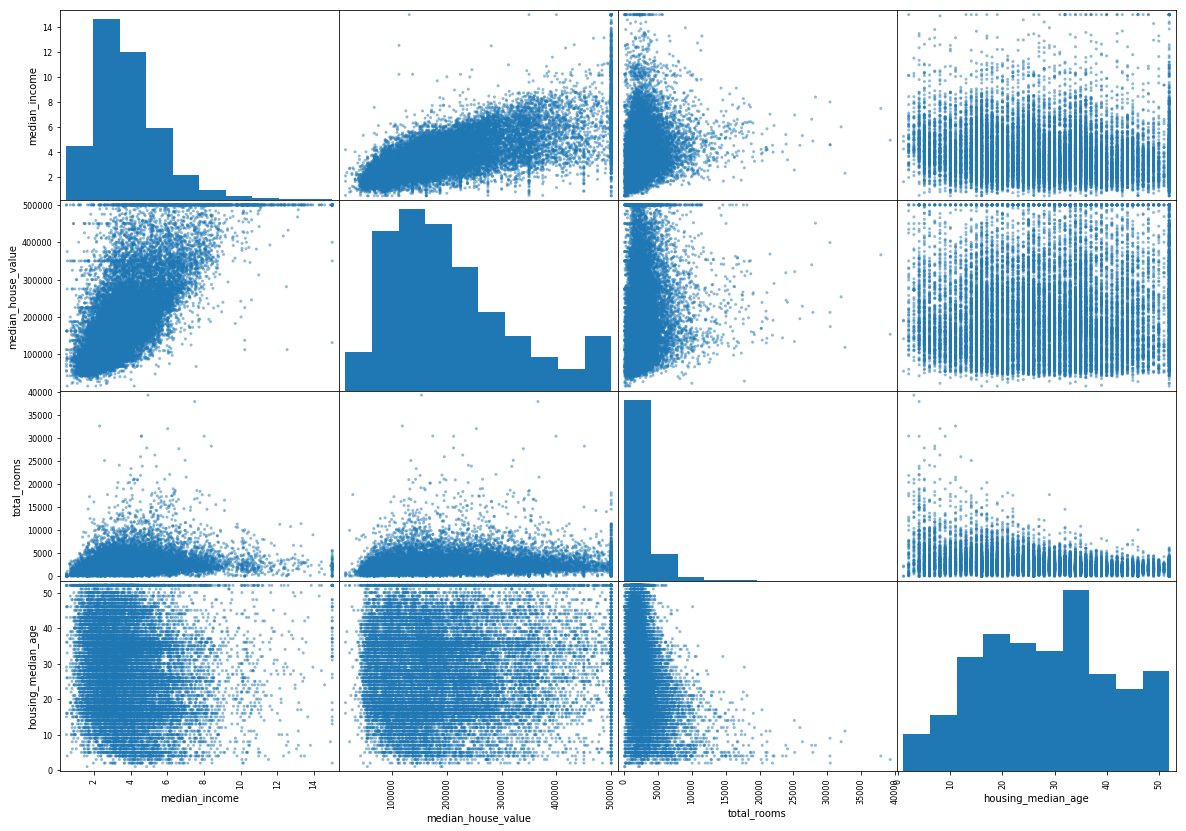

In [0]:
cols = ["median_income","median_house_value","total_rooms","housing_median_age"]

scatter_matrix(df[cols], figsize=(20, 14))

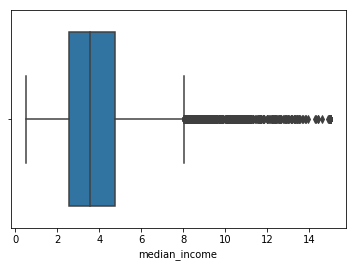

In [0]:
sns.boxplot(x=df['median_income'])

In [0]:
print(df['median_income'].shape[0])

print(df[ (df['median_income']>=8) ]['median_income'].shape[0])

20640
691


In [0]:
clean_df = df[ (df['median_income']<8) ]

In [0]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
median_house_CLASS   0.041877  0.148951           -0.097020    -0.137206   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
median_house_CLASS       -0.057550    0.013049   -0.074098      -0.657812   

                    median_house_value  median_house_CLASS  
longitude                    -0.045967            0.041877  
latitude                     -0.144160            0.148951  
housing_median_age            0.105623           -0.097020  
total_rooms                   0.134153           -0.137206  
total_bedrooms                0.049686           -0.057550  
population                   -0.024650            0.013049  
households                    0.065843           -0.074098  
median_income                 0.688075           -0.657812  
median_house_value            1.000000           -0.967303  
median_house_CLASS           -0.967303            1.000000

In [0]:
clean_df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923912           -0.106562     0.042173   
latitude            -0.923912  1.000000            0.007190    -0.031391   
housing_median_age  -0.106562  0.007190            1.000000    -0.365345   
total_rooms          0.042173 -0.031391           -0.365345     1.000000   
total_bedrooms       0.067755 -0.066482           -0.323338     0.935088   
population           0.099845 -0.110178           -0.297317     0.858314   
households           0.053360 -0.070708           -0.305244     0.921657   
median_income       -0.014486 -0.081558           -0.158781     0.226265   
median_house_value  -0.047066 -0.147510            0.117738     0.123723   
median_house_CLASS   0.042341  0.150871           -0.107607    -0.127139   

                    total_bedrooms  population  households  median_income  \
longitude                 0.067755    0.099845    0.053360      -0.014486   
latitude                 -0.066482   -0.110178   -0.070708      -0.081558   
housing_median_age       -0.323338   -0.297317   -0.305244      -0.158781   
total_rooms               0.935088    0.858314    0.921657       0.226265   
total_bedrooms            1.000000    0.876045    0.979379       0.029442   
population                0.876045    1.000000    0.905987       0.038200   
households                0.979379    0.905987    1.000000       0.053022   
median_income             0.029442    0.038200    0.053022       1.000000   
median_house_value        0.072668   -0.013536    0.088212       0.620828   
median_house_CLASS       -0.077725    0.002399   -0.093576      -0.605615   

                    median_house_value  median_house_CLASS  
longitude                    -0.047066            0.042341  
latitude                     -0.147510            0.150871  
housing_median_age            0.117738           -0.107607  
total_rooms                   0.123723           -0.127139  
total_bedrooms                0.072668           -0.077725  
population                   -0.013536            0.002399  
households                    0.088212           -0.093576  
median_income                 0.620828           -0.605615  
median_house_value            1.000000           -0.963646  
median_house_CLASS           -0.963646            1.000000

C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269894D9E48>,
      dtype=object)

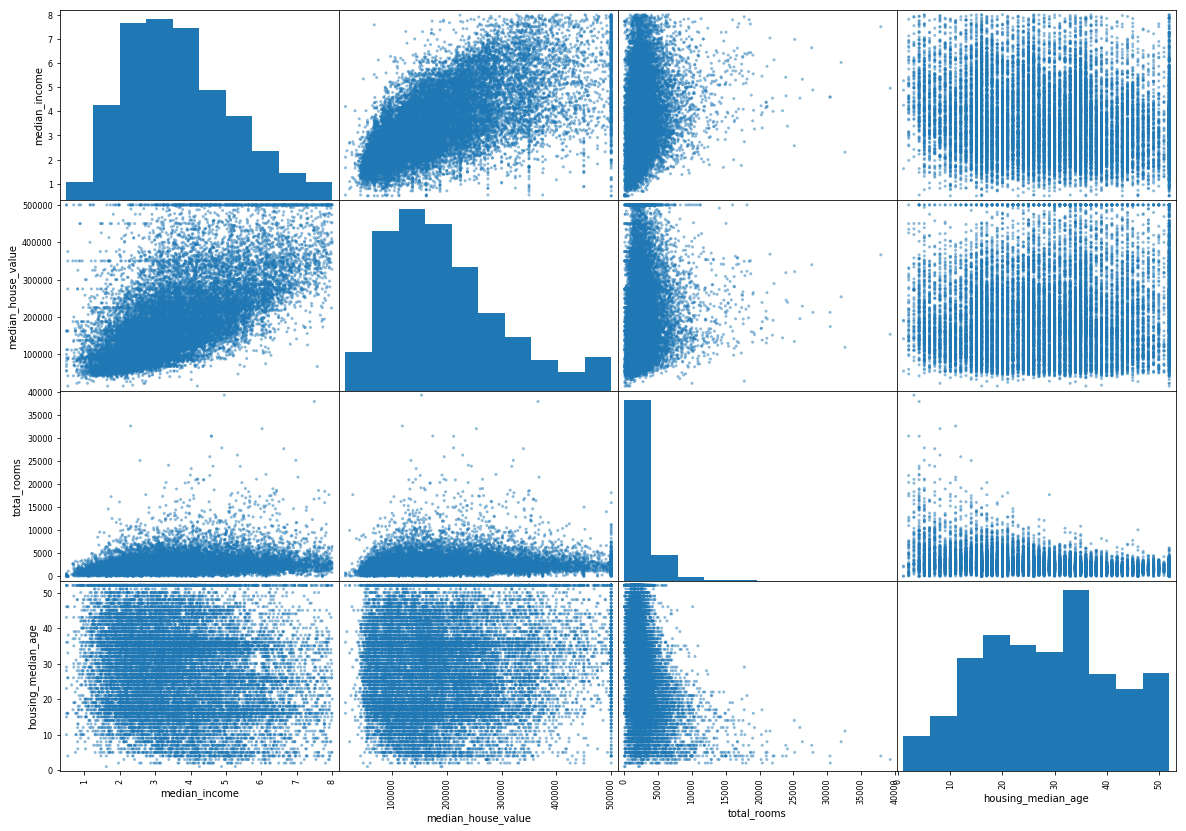

In [0]:
cols = ["median_income","median_house_value","total_rooms","housing_median_age"]

scatter_matrix(clean_df[cols], figsize=(20, 14))

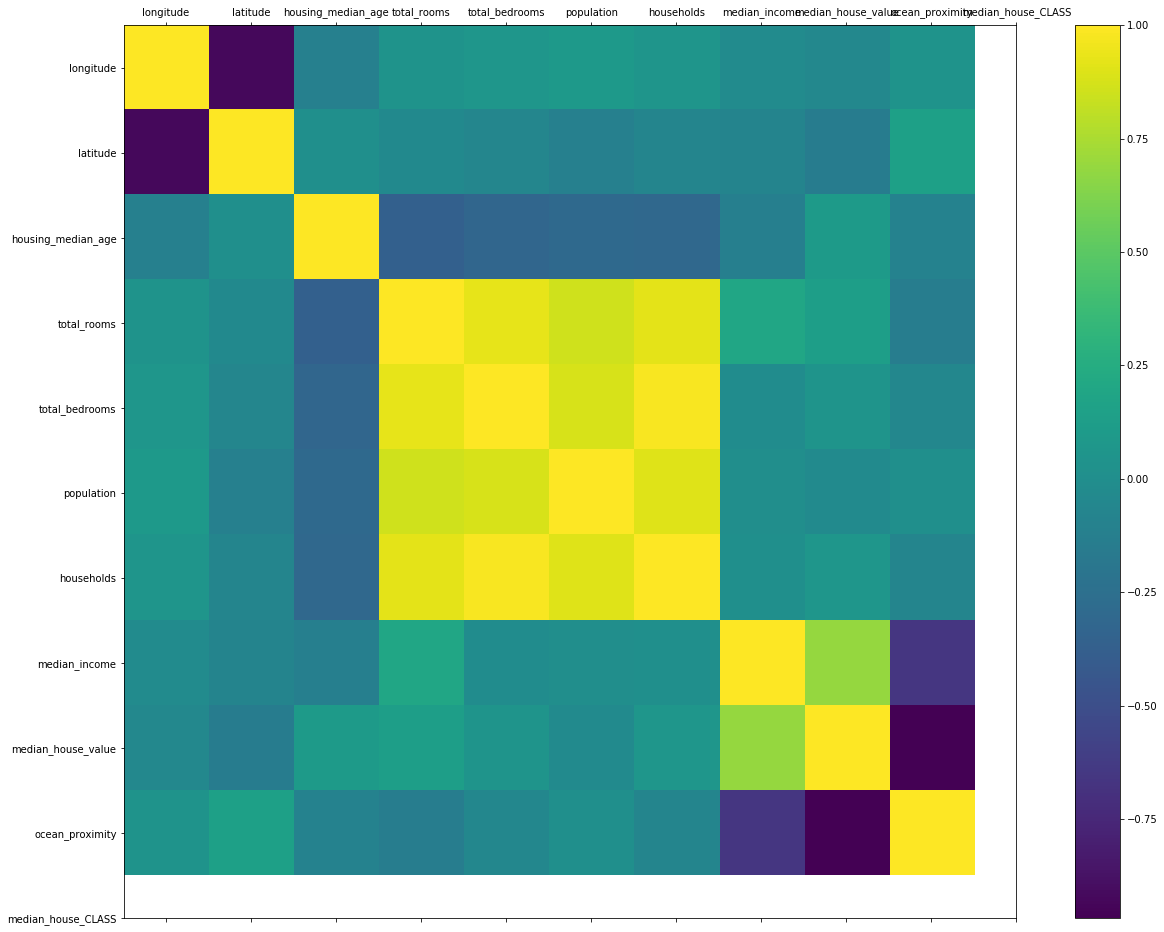

In [0]:
plt.figure(figsize=(21,16))
plt.matshow(df.corr(), fignum=1)

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)

plt.colorbar()
plt.show()

## KFold

In [0]:
data_y = df['median_house_CLASS']
data_x = df.drop(['median_house_CLASS', 'median_house_value'], axis=1)

In [0]:
skf = KFold(n_splits=5, random_state=101)
for train_index, test_index in skf.split(data_x, data_y):
    data_train_x =  data_x.iloc[ train_index ]
    data_train_y = data_y.iloc[ train_index ]
    
    data_test_x = data_x.iloc[ test_index ]
    data_test_y = data_y.iloc[ test_index ]
    
    
    
    print(data_test_x.shape[0])
    print(data_test_y.value_counts())
    print("\n===========\n")

4130
4    1658
3     978
5     720
2     419
1     355
Name: median_house_CLASS, dtype: int64


4128
4    1658
3     978
5     719
2     419
1     354
Name: median_house_CLASS, dtype: int64


4128
4    1658
3     978
5     719
2     419
1     354
Name: median_house_CLASS, dtype: int64


4128
4    1658
3     978
5     719
2     419
1     354
Name: median_house_CLASS, dtype: int64


4126
4    1657
3     977
5     719
2     419
1     354
Name: median_house_CLASS, dtype: int64


